In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_to_directory= './drive/MyDrive/images_labelled'

In [ ]:
#!/usr/local/bin/python3
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


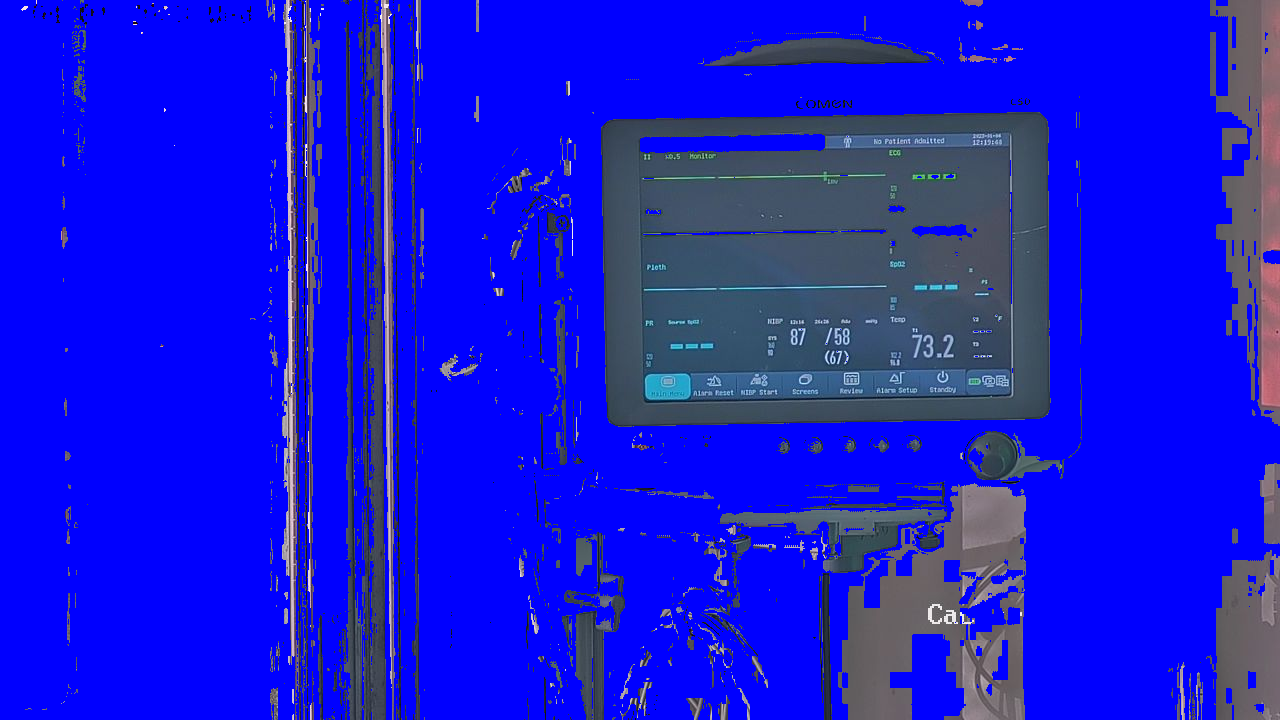

True

In [ ]:
# convert the image to a numpy array, provide the path to the img
image = cv.imread('/content/drive/MyDrive/datasets/images_unlabelled/cachar_icu_mon--5_2023_1_4_10_9_41.jpeg')
hsv=cv.cvtColor(image,cv.COLOR_BGR2HSV)

# Define lower and uppper limits of what we call "brown" and "gray" (found using hsv color-space trackbar)
brown_lo=np.array([0,0,0])
brown_hi=np.array([60,255,255])

lower_gray = np.array([0,0,0])
upper_gray = np.array([150,42,255])

black_low=np.array([10,10,10])
black_high=np.array([190,9,26])
# Mask image to only select browns and grays
mask=cv.inRange(hsv,brown_lo,brown_hi)
mask_b=cv.inRange(hsv, lower_gray, upper_gray)
image1= image.copy()
# Change image to blue where we found brown and white
image[mask>0]=(255,0,0)
image1[mask_b>0]= (255,0,0)
image1[mask>0]=(255,0,0)
# cv2_imshow(image)
cv2_imshow(image1)
cv.imwrite("result.png",image1)

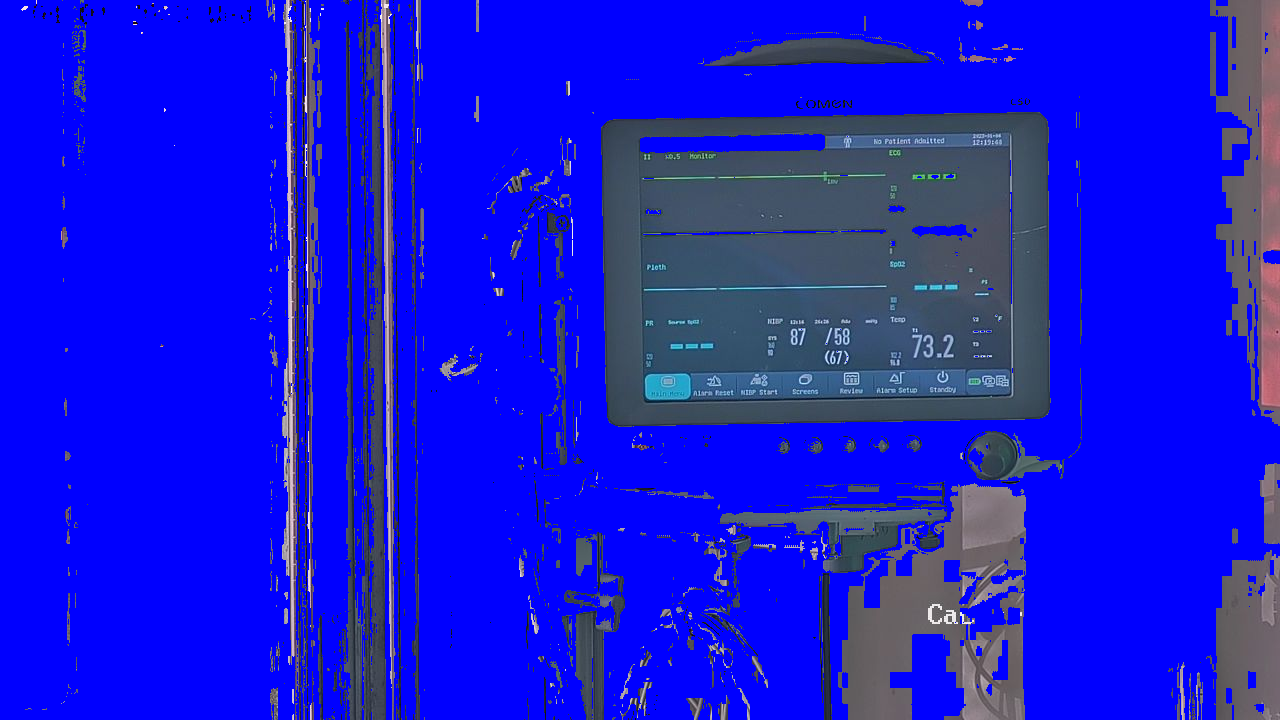

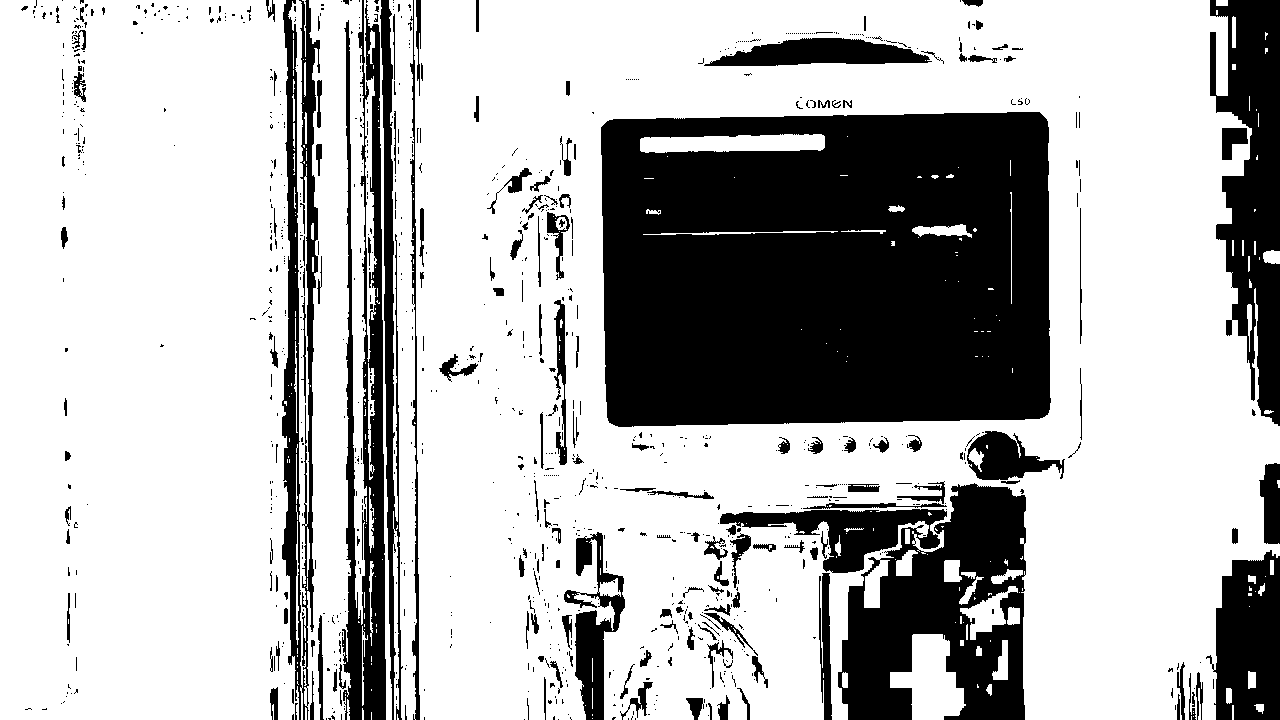

In [ ]:
# convert to LAB color space
cv2_imshow(image1)
lab = cv.cvtColor(image1, cv.COLOR_BGR2LAB)

# Perform Otsu threshold on the A-channel 
t = cv.threshold(lab[:,:,2], 127, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)[1]
# cv.drawContours(q, [contours_98[cnt_i]], -1, (0, 255, 0), 3)
# plt.imshow(cv.drawContours(q, [contours_98[cnt_i]], -1, (0, 255, 0), 1))
cv2_imshow(t)

In [ ]:
img1 = cv.imread('/content/drive/MyDrive/datasets/images_unlabelled/cachar_icu_mon--5_2023_1_4_10_9_41.jpeg')

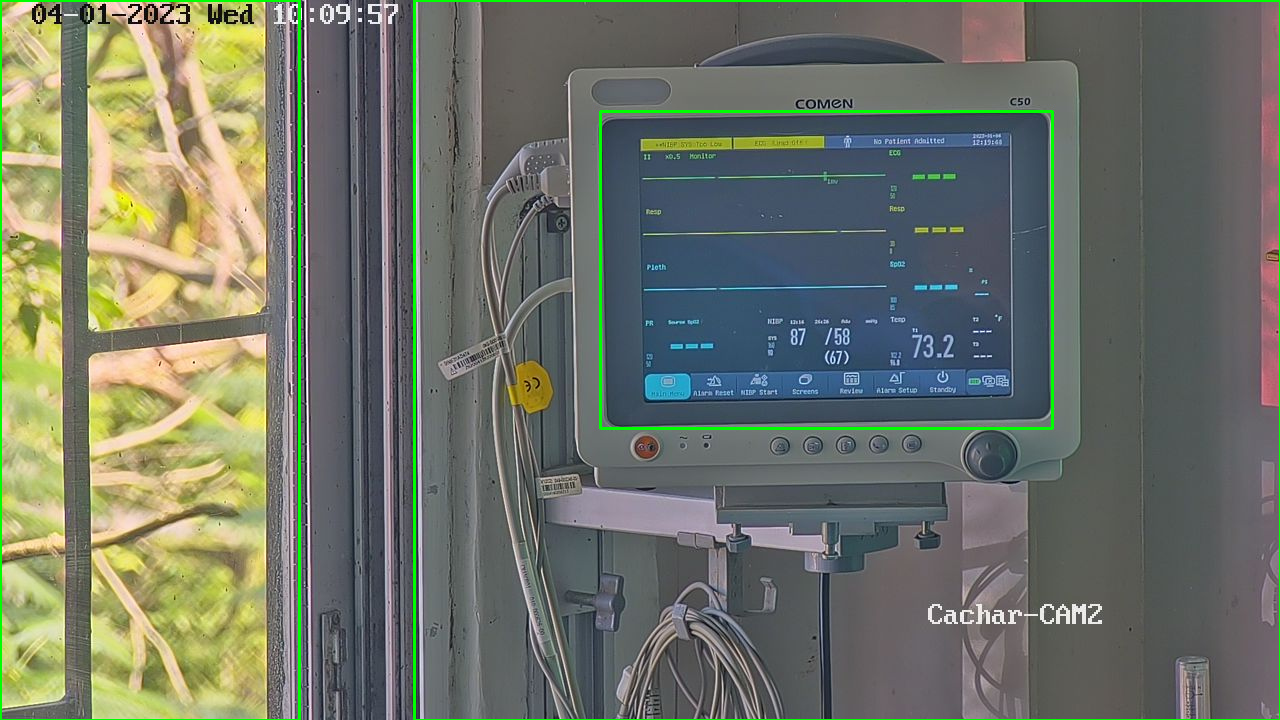

In [ ]:
img = img1.copy()
contours, hier = cv.findContours(t,cv.RETR_LIST,cv.CHAIN_APPROX_SIMPLE)
gray2=t.copy()
for cnt in contours:
    if 60000<cv.contourArea(cnt):
        (x,y,w,h) = cv.boundingRect(cnt)
        cv.rectangle(img, (x, y), (x+w, y+h), (0,255,0), 2)
        # cv.rectangle(gray2,(x,y),(x+w,y+h),0,-1)

cv2_imshow(img)

In [ ]:
cv.imwrite('original.jpeg', img1)
cv.imwrite('filter.jpeg', image1)
cv.imwrite('thresholded.jpeg', t)
cv.imwrite('contour.jpeg', gray2)
cv.imwrite('result.jpeg', img)

True

In [ ]:
%mkdir trueskan
%mv /content/drive/MyDrive/datasets/hospitals_splitted/train/siukaphahospital_icu_mon--1*.jpeg /content/trueskan

mkdir: cannot create directory ‘trueskan’: File exists
mv: cannot stat '/content/drive/MyDrive/datasets/hospitals_splitted/train/siukaphahospital_icu_mon--1*.jpeg': No such file or directory


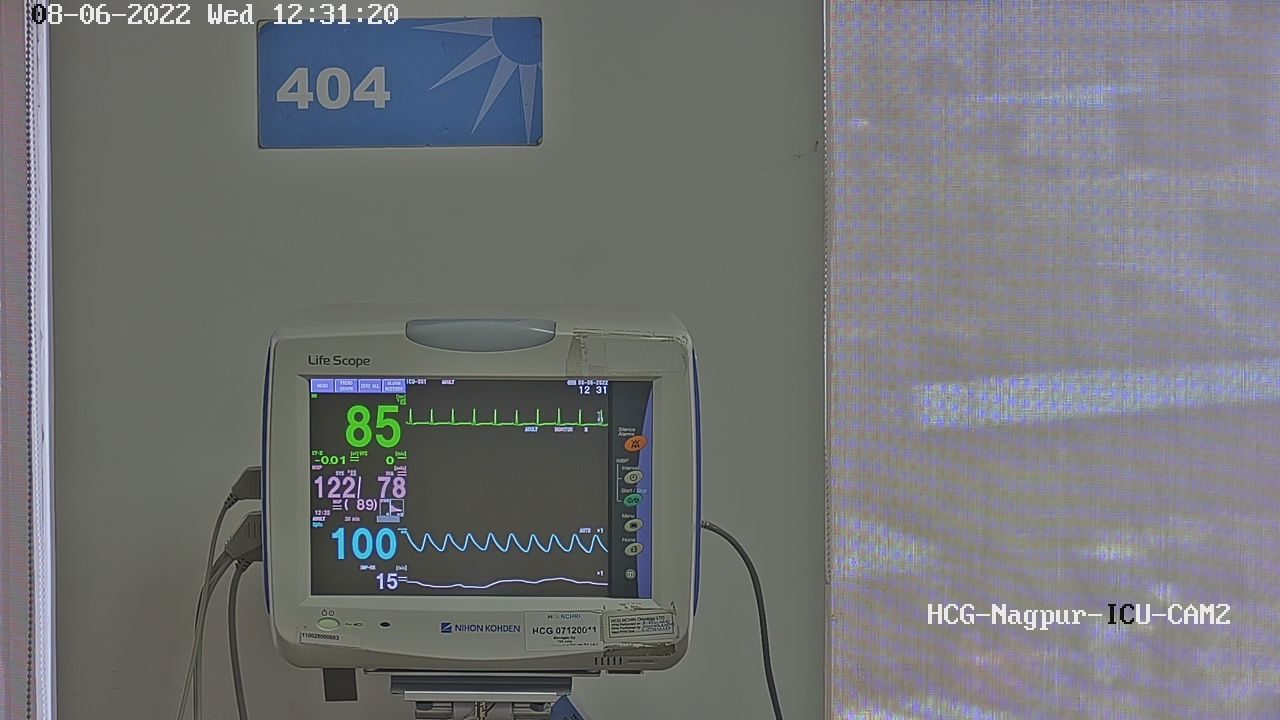

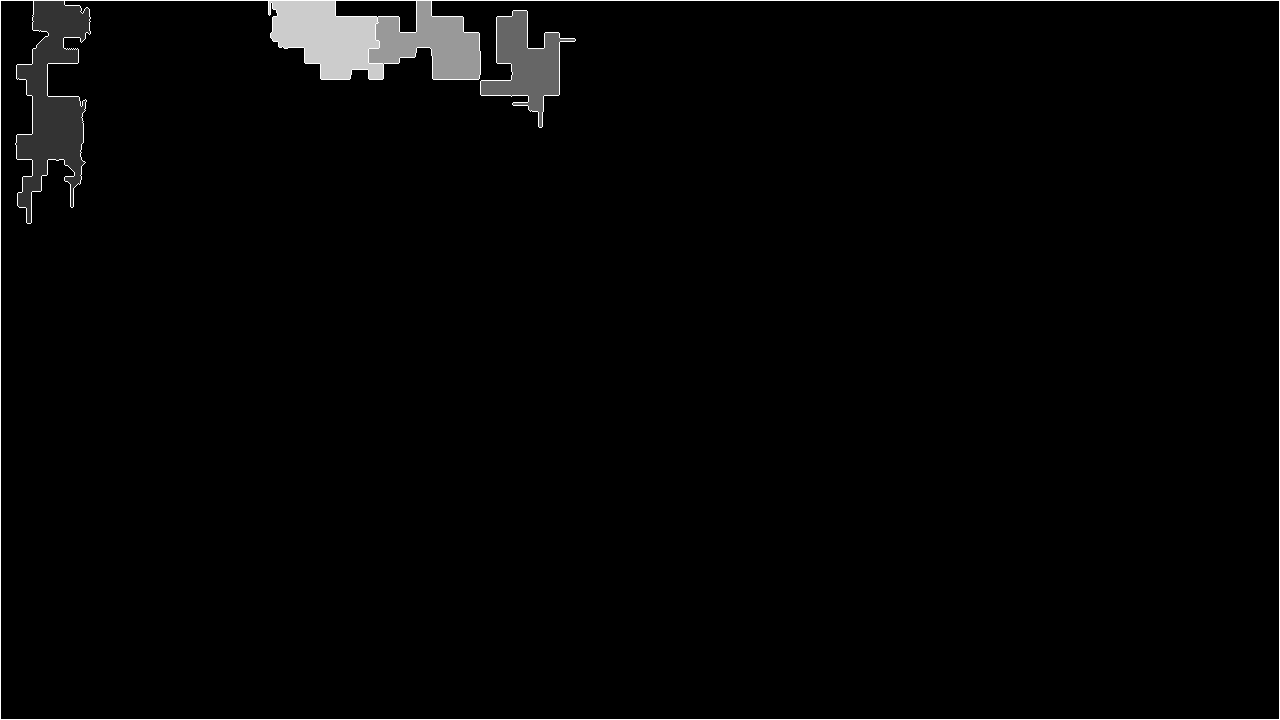

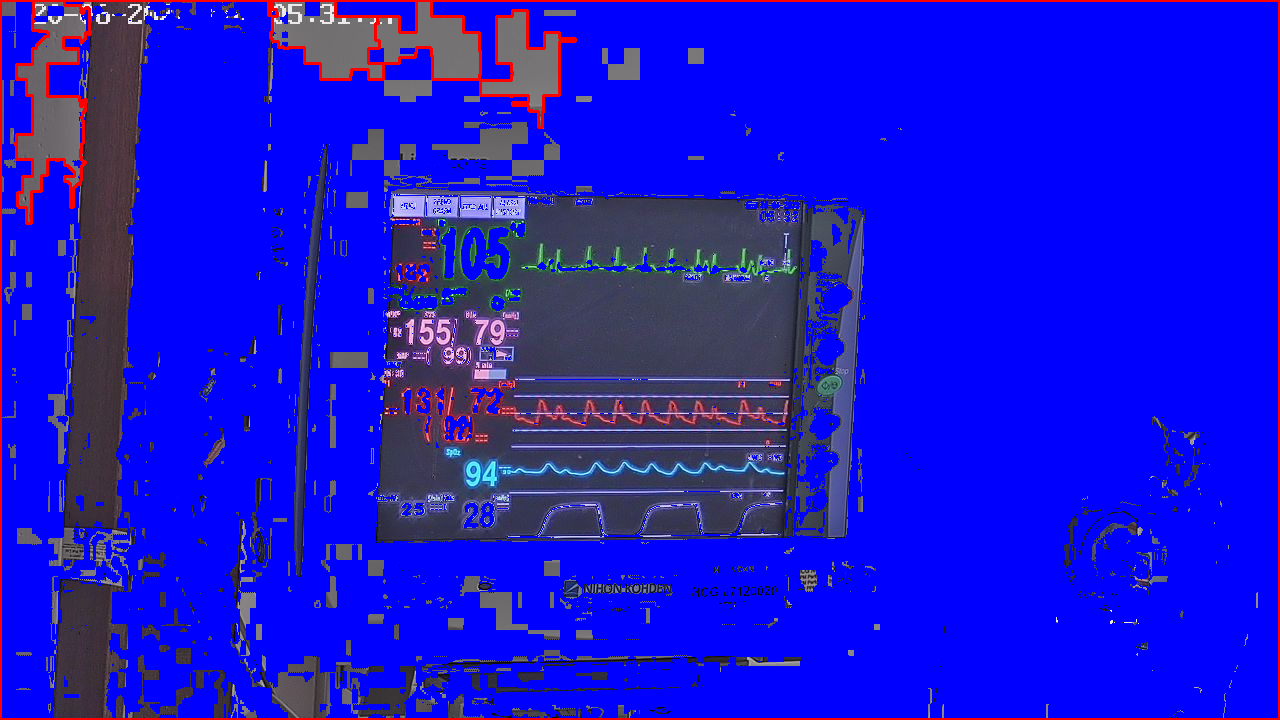

In [ ]:
# applying watershedding and granulometry on the image (approach #2)

import cv2
import numpy
from scipy.ndimage import label

def segment_on_dt(a, img):
    border = cv2.dilate(img, None, iterations=10)
    border = border - cv2.erode(border, None)

    dt = cv2.distanceTransform(img, 2, 3)
    dt = ((dt - dt.min()) / (dt.max() - dt.min()) * 255).astype(numpy.uint8)
    _, dt = cv2.threshold(dt, 180, 255, cv2.THRESH_BINARY)
    lbl, ncc = label(dt)
    lbl = lbl * (255 / (ncc + 1))
    # Completing the markers now. 
    lbl[border == 255] = 255

    lbl = lbl.astype(numpy.int32)
    cv2.watershed(a, lbl)

    lbl[lbl == -1] = 0
    lbl = lbl.astype(numpy.uint8)
    return 255 - lbl


image = cv2.imread('/content/drive/MyDrive/images_labelled/hcgnagpur_icu_mon--4_2022_6_8_12_30_29.jpeg')

# Pre-processing.
hsv=cv.cvtColor(image,cv.COLOR_BGR2HSV)


# image1[mask_b>0]= (255,0,0)
img= cv2.imread('/content/drive/MyDrive/images_labelled/hcgnagpur_icu_mon--4_2022_6_8_12_30_29.jpeg')
img= image1.copy()
try:
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
except:
  pass    
_, img_bin = cv2.threshold(img_gray, 0, 255,
        cv2.THRESH_OTSU)
img_bin = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN,
        numpy.ones((3, 3), dtype=int))

result = segment_on_dt(img, img_bin)
cv2_imshow(result)
result[result != 255] = 0
result = cv2.dilate(result, None)
img[result == 255] = (0, 0, 255)
cv2_imshow(img)

In [ ]:
# Load as greyscale - no colour anyway
im = cv2.imread('/content/drive/MyDrive/images_labelled/kamalnayanbajaj_micu_mon--16_2022_6_20_8_46_46.jpeg', cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)
# Otsu threshold
_, thr = cv2.threshold(im,127,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
contours, hier = cv.findContours(thr,cv.RETR_LIST,cv.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    if 200<cv.contourArea(cnt):
        (x,y,w,h) = cv.boundingRect(cnt)
        cv.rectangle(gray2, (x, y), (x+w, y+h), (0,0,0), 2)
        # cv.rectangle(gray2,(x,y),(x+w,y+h),0,-1)


cv2_imshow(thr)